In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
file_path = 'dorothea_train.data'
max_len = 0
num_lines = sum(1 for line in open(file_path))

with open(file_path) as myfile:
     for j in range(num_lines):
        new_len = np.fromstring(myfile.readline() , sep=' ',dtype=int).shape[0]
        if new_len >= max_len:
            max_len = new_len
   
        
       
data = np.zeros((num_lines,max_len),  dtype=int)

with open('dorothea_train.data') as myfile:

    j = 0
    for j in range(num_lines):
        tmp_np = np.fromstring(myfile.readline() , sep=' ',dtype=int)
        for i in range(len(tmp_np)):
            data[j][i] = tmp_np[i]

        

print(
"""
data size : {}

max one line len : {}

number of file line : {}
"""
.format(data.shape , max_len , num_lines))


data size : (800, 6061)

max one line len : 6061

number of file line : 800



In [3]:

pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,...,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060
0,191,367,614,634,711,1202,1220,1311,1472,1730,...,0,0,0,0,0,0,0,0,0,0
1,118,307,367,478,505,512,807,878,939,1024,...,0,0,0,0,0,0,0,0,0,0
2,10,184,284,297,320,375,445,588,658,1108,...,0,0,0,0,0,0,0,0,0,0
3,87,149,433,704,711,892,988,1056,1070,1234,...,0,0,0,0,0,0,0,0,0,0
4,84,118,279,316,435,505,584,629,849,1029,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,374,1031,1271,1312,1452,1517,1628,1668,1898,1958,...,0,0,0,0,0,0,0,0,0,0
796,106,465,1095,1119,1176,1658,1669,1679,1813,1889,...,0,0,0,0,0,0,0,0,0,0
797,140,273,303,354,383,436,619,640,798,866,...,0,0,0,0,0,0,0,0,0,0
798,126,150,354,377,379,702,764,1099,1110,1220,...,0,0,0,0,0,0,0,0,0,0


In [4]:
pd.DataFrame(data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 6061 entries, 0 to 6060
dtypes: int64(6061)
memory usage: 37.0 MB


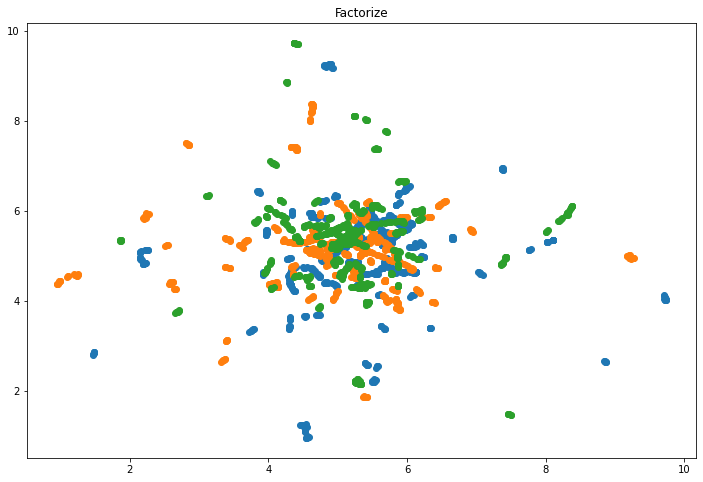

In [17]:
import umap
um = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=100)
numeric_data = data
um_result = um.fit_transform(numeric_data)
plt.figure(figsize=(12, 8))
plt.title('Factorize')
plt.scatter(um_result[:, 0], um_result[:, 1])
plt.scatter(um_result[:, 1], um_result[:, 2])
plt.scatter(um_result[:, 2], um_result[:, 0])


In [18]:

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=20, kernel='rbf', gamma=15)
kpca = kpca.fit(um_result)
kpca_result = kpca.transform(um_result)


/home/amin/.local/lib/python3.6/site-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


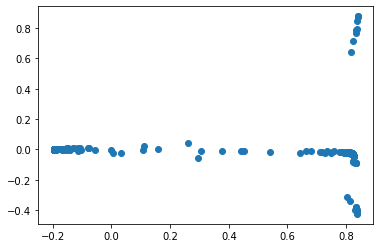

In [19]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
kpca = kpca.fit(kpca_result)
kpca_result = kpca.transform(kpca_result)
plt.scatter(kpca_result[:, 0], kpca_result[:, 1])
plt.show()